In [16]:
import pandas as pd

df = pd.read_csv("Wine dataset.csv")

print(df.head())
print(df["class"].value_counts())


   class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                          3.92      1065  
1             4.38  1.05

In [17]:
X = df.drop("class", axis=1)
y = df["class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()


--- Logistic Regression ---
Accuracy: 0.9722
Precision: 0.9741
Recall: 0.9722
F1 Score: 0.9720

--- Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

--- SVM ---
Accuracy: 0.9722
Precision: 0.9741
Recall: 0.9722
F1 Score: 0.9720

--- KNN ---
Accuracy: 0.9722
Precision: 0.9747
Recall: 0.9722
F1 Score: 0.9724

--- Decision Tree ---
Accuracy: 0.9167
Precision: 0.9204
Recall: 0.9167
F1 Score: 0.9174



In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": randint(2, 10)
}

search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,
                            n_iter=10, cv=5, scoring="f1_macro", random_state=42)
search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best F1 Score:", search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 121}
Best F1 Score: 0.9926570048309179


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



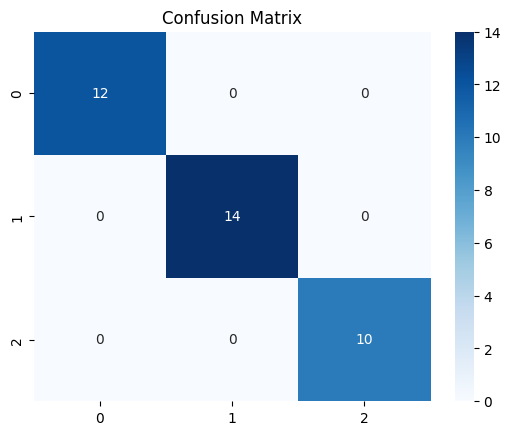

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [24]:
results_df = pd.DataFrame(results).T
print("Initial Model Performance:")
print(results_df)

Initial Model Performance:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.972222   0.974074  0.972222  0.971970
Random Forest        1.000000   1.000000  1.000000  1.000000
SVM                  0.972222   0.974074  0.972222  0.971970
KNN                  0.972222   0.974747  0.972222  0.972369
Decision Tree        0.916667   0.920370  0.916667  0.917372


In [25]:
best_model = results_df['F1 Score'].idxmax()
print(f"\nBest Performing Model: {best_model}")


Best Performing Model: Random Forest
